In [2]:
import os 
import tarfile 
import urllib
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

csv_path=os.path.join("https://raw.githubusercontent.com/iJovanGG/MachineLearning/master/datasets/income/", "adult.csv")

income = pd.read_csv(csv_path)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  yearly-income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
categoryColumns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'yearly-income']
for col in categoryColumns:
    income.drop(income[income[col] == '?'].index, inplace=True)

In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  yearly-income   30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.7+ MB


In [6]:
income["workclass"].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [7]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


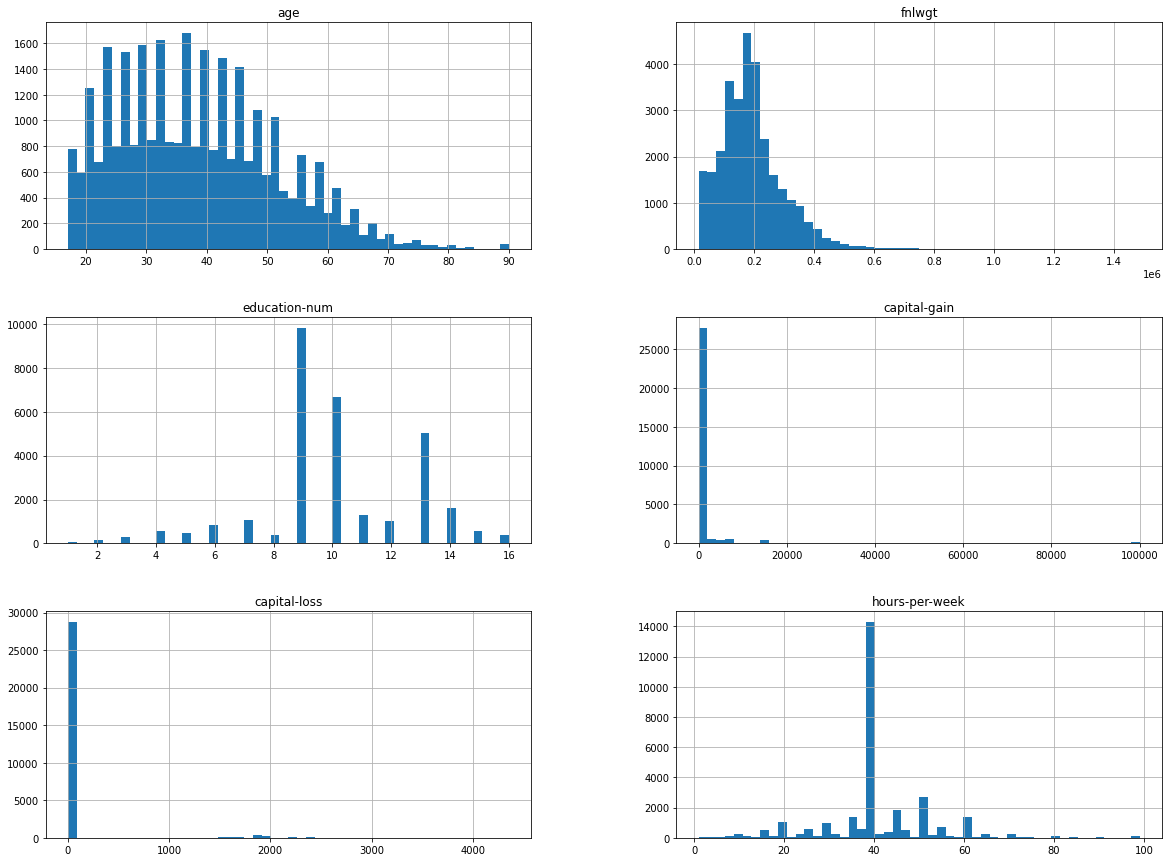

In [8]:
#import matplotlib.pyplot as plt
income.hist(bins=50, figsize=(20,15))

plt.show()

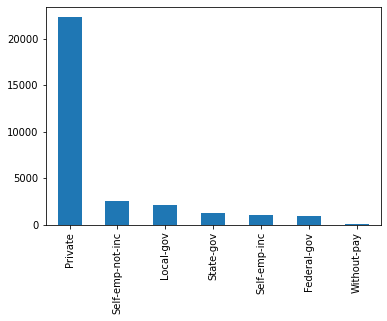

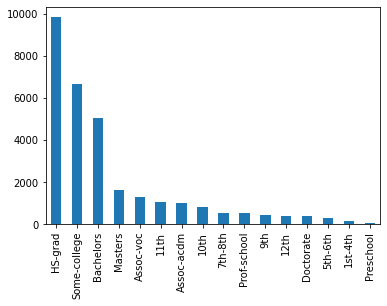

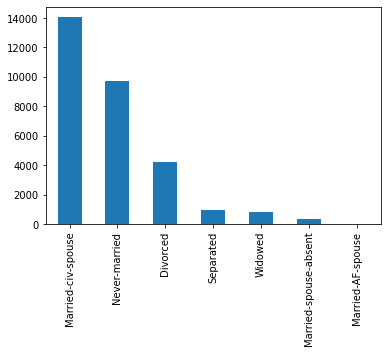

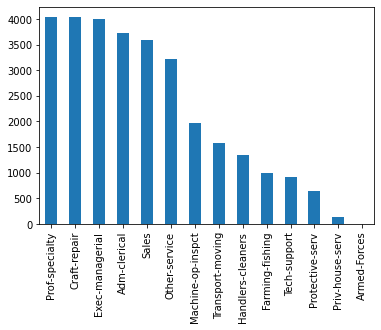

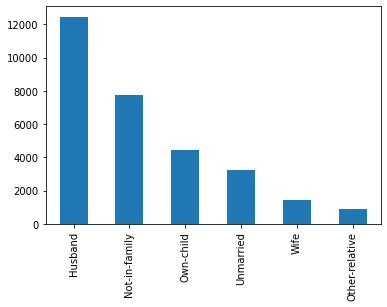

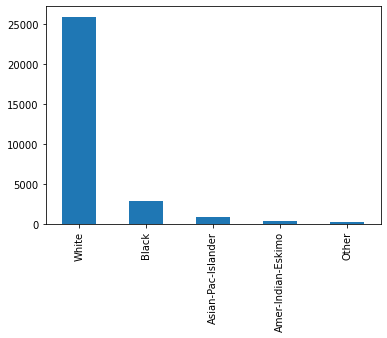

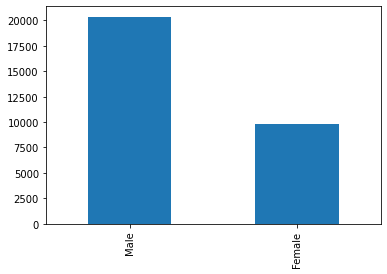

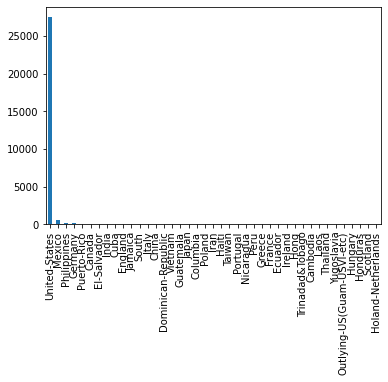

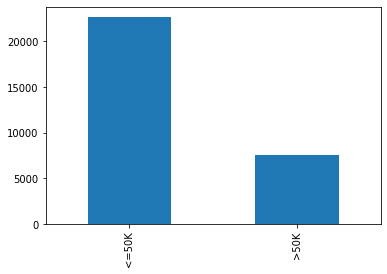

In [9]:
#fig, ax = plt.subplots()
#ax.plot(income['race'], income['race'].value_counts())

for col in categoryColumns:
    income[col].value_counts().plot(kind='bar')
    plt.show()

In [10]:
income['yearly-income'].value_counts()

<=50K    22654
>50K      7508
Name: yearly-income, dtype: int64

In [11]:
income_all = income['yearly-income'].value_counts(normalize = True)
income_all*100

<=50K    75.107751
>50K     24.892249
Name: yearly-income, dtype: float64

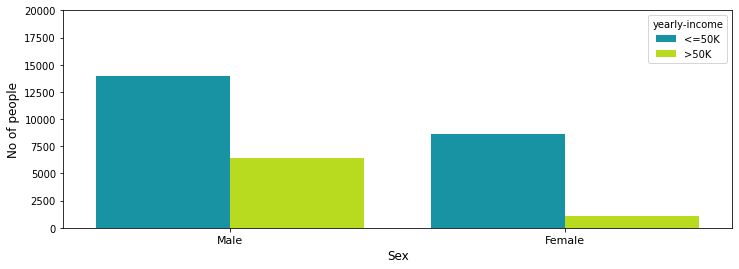

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(data = income, x = 'sex', hue="yearly-income", palette = 'nipy_spectral')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.show()

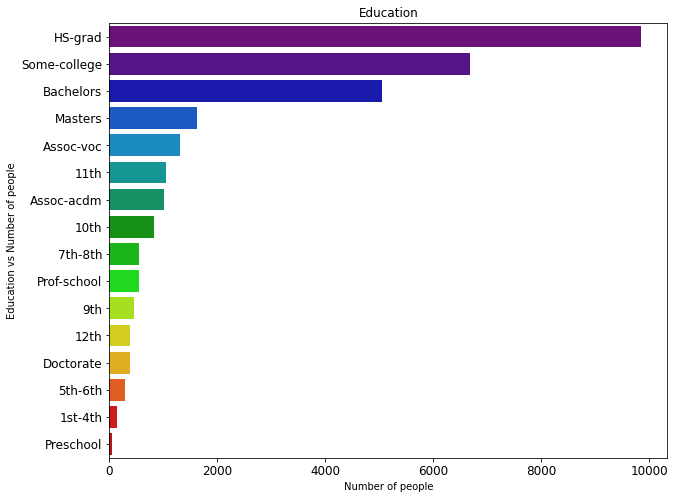

In [13]:
plt.figure(figsize=(10,8))

education = income["education"].value_counts()
sns.barplot(education.values, education.index, palette='nipy_spectral')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

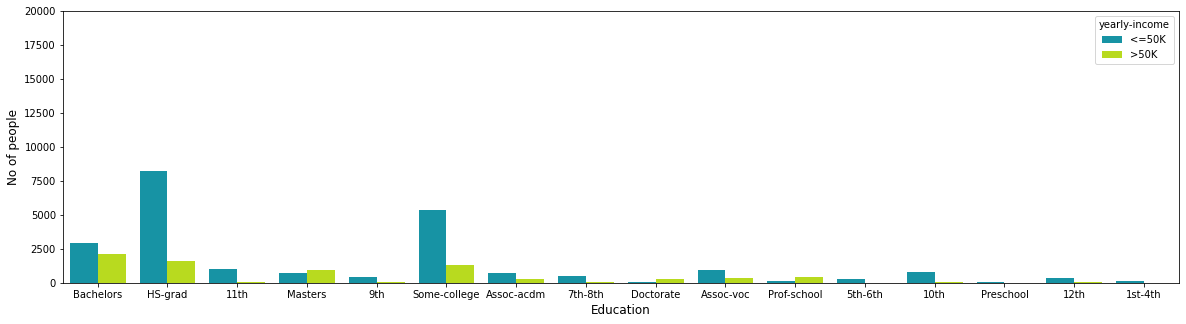

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(data = income, x = 'education', hue="yearly-income", palette = 'nipy_spectral')
plt.xlabel("Education", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

In [15]:
income['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

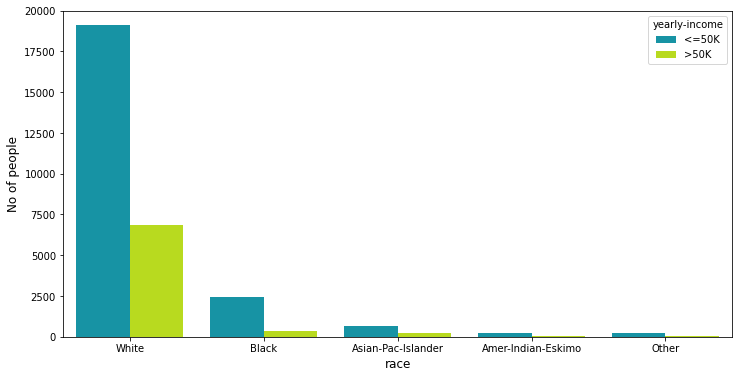

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data = income, x = 'race', hue="yearly-income", palette = 'nipy_spectral')
plt.xlabel("race", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

income['marital-status'].value_counts()

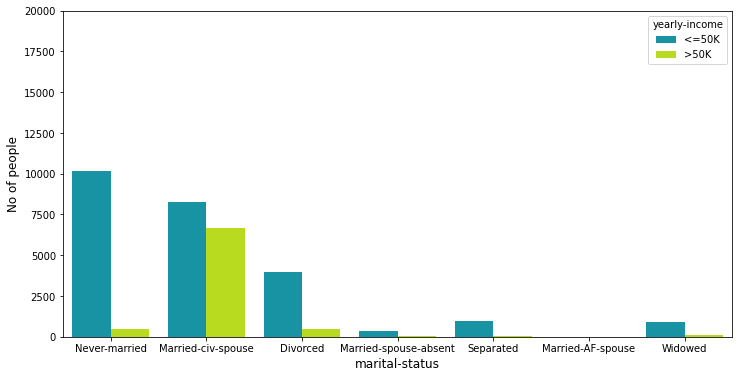

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data = income, x = 'marital-status', hue="yearly-income", palette = 'nipy_spectral')
plt.xlabel("marital-status", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
plt.ylim(0,20000) 
plt.show()

In [18]:
income['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
income['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [20]:
income['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [21]:
income.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
yearly-income     0
dtype: int64

In [22]:
#income.replace('?',0,inplace=True)

In [23]:
income['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
income = income.replace(0,np.nan)

In [28]:
income["workclass"] = income["workclass"].fillna(income["workclass"].mode()[0])
income["occupation"] = income["occupation"].fillna(income["occupation"].mode()[0])
income["native-country"] = income["native-country"].fillna(income["native-country"].mode()[0])

In [30]:
income['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,NaN,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN,NaN,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN,NaN,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN,NaN,40,Cuba,<=50K


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
income['yearly-income'] = le.fit_transform(income['yearly-income'])

In [33]:
from sklearn.preprocessing import LabelEncoder
for col in income.columns:
    if income[col].dtypes == 'object':
        le = LabelEncoder()        
        income[col] = le.fit_transform(income[col].astype(str))

In [34]:
income = income.replace(np.nan,0)

In [35]:
income.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,5,77516,9,13,4,0,1,4,1,2174.0,0.0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0.0,0.0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0.0,0.0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0.0,0.0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0.0,0.0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0.0,0.0,40,38,0
6,49,2,160187,6,5,3,7,1,2,0,0.0,0.0,16,22,0
7,52,4,209642,11,9,2,3,0,4,1,0.0,0.0,45,38,1
8,31,2,45781,12,14,4,9,1,4,0,14084.0,0.0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178.0,0.0,40,38,1


## income.corr()

In [36]:
X = income.drop("yearly-income",axis=1)
y = income.iloc[:,-1:]
y.head(20)

,yearly-income
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


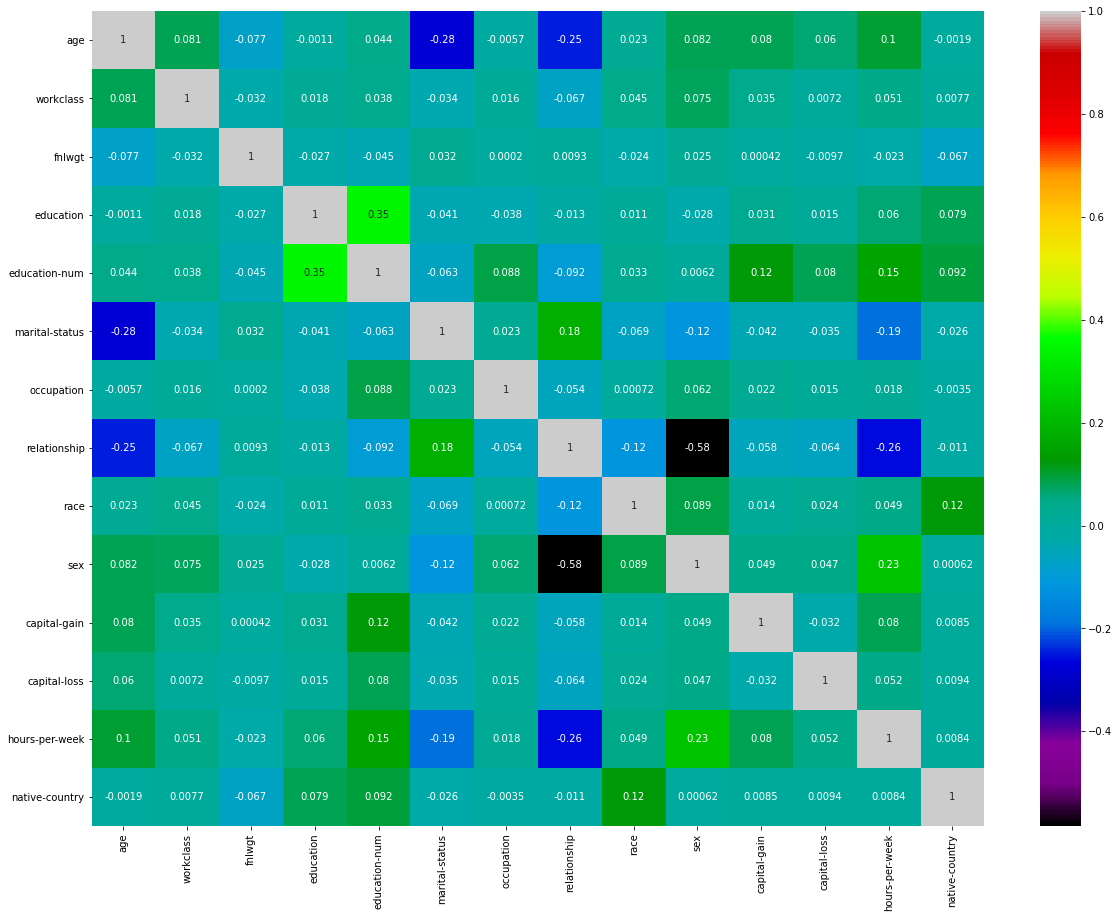

In [37]:
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, cmap="nipy_spectral")
plt.show()

In [1]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [39]:
clf = DecisionTreeClassifier( max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# acc_clf = round(clf.score(X_train, y_train) * 100, 2)
acc_clf = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8291523925295613


In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
# acc_rf = round(random_forest.score(X_train, y_train) * 100, 2)
acc_rf = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8469444137473754


In [41]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
# acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd = round(metrics.accuracy_score(y_test, y_pred)* 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.783180461929495


In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7814123107525693


In [43]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
# acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7414078903746271


In [44]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train) 
y_pred = gaussian.predict(X_test) 
# acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7852801414520941


In [45]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Stochastic Gradient Decent', 'Logistic Regression', 'KNN', 
              'Naive Bayes'],
    'Score': [acc_clf,
              acc_rf,acc_sgd,acc_log,acc_knn,acc_gaussian]})                
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
84.69,Random Forest
82.92,Decision Tree
78.53,Naive Bayes
78.32,Stochastic Gradient Decent
78.14,Logistic Regression
74.14,KNN


In [46]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
fnlwgt,0.165
age,0.148
capital-gain,0.113
relationship,0.104
education-num,0.099
hours-per-week,0.080
marital-status,0.073
occupation,0.066
workclass,0.039


<AxesSubplot:xlabel='feature'>

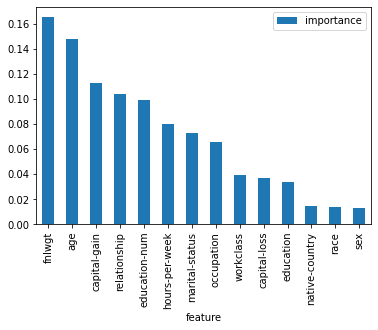

In [47]:
importances.plot.bar()

In [48]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [49]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
print("Accuracy:",metrics.accuracy_score(y_test, Y_prediction))
print("F1 Score: ", round(f1_score(y_test,Y_prediction) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,Y_prediction) * 100,3))

oob score: 85.59 %
Accuracy: 0.8450657531218919
F1 Score:  67.243
MSE:  15.493
